In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [19]:
df['Age'].isnull().sum()

177

In [13]:
age = df['Age'].dropna().sample(df['Age'].isnull().sum())

In [16]:
age.isnull().sum()

0

In [17]:
age.shape

(177,)

In [20]:
age.index

Int64Index([525, 133, 641, 795, 287, 887, 604, 812, 585, 565,
            ...
            148,  81, 263, 800, 202, 550, 822, 703, 801, 821],
           dtype='int64', length=177)

In [26]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),
                                                 random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random']= random_sample

In [24]:
median = df.Age.median()
print(median)

28.0


In [27]:
impute_nan(df,'Age',median)

In [28]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [31]:
 df['Age_median'].isnull().sum()

0

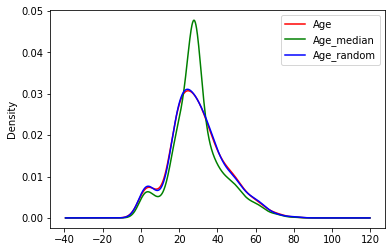

In [33]:
fig = plt.figure()
ax = fig.add_subplot()
df['Age'].plot(kind='kde', ax=ax, color='red')
df['Age_median'].plot(kind='kde', ax=ax, color='green')
df['Age_random'].plot(kind='kde', ax=ax, color='blue')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [34]:
df['Age_random'].isnull().sum()

0